## REGRESSION WITH LINEAR REGRESSION

The goal of simple (univariate) linear regression is to model the relationship between
a single feature (explanatory variable x) and a continuous valued response (target
variable y).

#### DATASET: Advertising Sales Prediction

In [33]:
# Importing common libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


### IMPORT DATA 

In [35]:
data=pd.read_csv("data\\Company_Data.csv")

In [36]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [37]:
#check mising data
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [101]:
data.shape

(200, 4)

### PRELIMINARY ANALYSIS

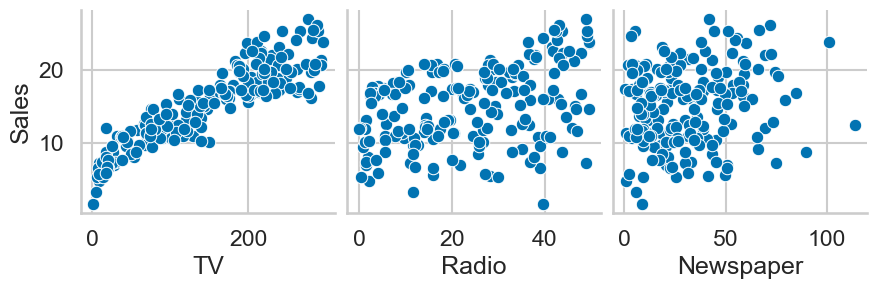

In [39]:
# Let's see how Sales are related with other variables using scatter plot.
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', height=3, aspect=1, kind='scatter')
plt.show()0

inference: TV has linear correlation with Sales

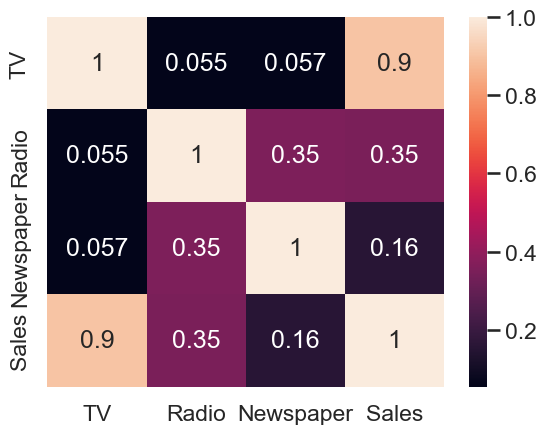

In [41]:
# Visualizing the data using heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()

## Understanding the Heat map
1. A correlation of 1 (diagonal cells) indicates a perfect positive correlation (the variable compared to itself).
2. Values near 0 indicate little to no linear relationship.
3. Positive values (e.g., 0.9) indicate a positive linear relationship: when one variable increases, the other tends to increase.
4. Negative values (though not present here) would indicate an inverse relationship: when one variable increases, the other tends to decrease
5. Interpretation of Your Heatmap:

TV and Sales:
* Correlation of 0.9 suggests a strong positive relationship between TV advertising and sales. More TV advertising likely leads to higher sales.
* Radio and Sales: Correlation of 0.35 indicates a moderate positive relationship between Radio ads and sales.
* Newspaper and Sales: Correlation of 0.16 shows a weak positive relationship between newspaper ads and sales.
* TV and Radio/Newspaper: Correlations of 0.055 and 0.057 show that there is little relationship between TV ads and the other two media.
* Radio and Newspaper: Correlation of 0.35 suggests a moderate association, possibly due to complementary advertising strategies.

### SPLIT DATASET

In [44]:
#Try prediction with TV as feature
#use reshape(-1,1) for a single feature; i.e. single column
X=data.TV.values.reshape(-1,1)

y=data.Sales.values.reshape(-1,1)


In [45]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [46]:
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

In [47]:
from sklearn.model_selection import train_test_split
#split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#This parameter controls the shuffling applied to the data before splitting.
#Using a fixed random state (like 42) ensures that you get the same split every time you run the code (useful for reproducibility).
#If you don’t set a random state, the split will be different each time you run the code.

In [48]:
X_train

array([[116. ],
       [177. ],
       [ 43.1],
       [ 62.3],
       [224. ],
       [ 38.2],
       [ 70.6],
       [147.3],
       [104.6],
       [ 76.3],
       [ 78.2],
       [168.4],
       [  8.7],
       [  7.8],
       [ 76.4],
       [129.4],
       [ 73.4],
       [289.7],
       [ 19.6],
       [197.6],
       [284.3],
       [184.9],
       [112.9],
       [ 23.8],
       [290.7],
       [ 19.4],
       [293.6],
       [ 18.7],
       [134.3],
       [ 25.6],
       [100.4],
       [ 80.2],
       [188.4],
       [177. ],
       [125.7],
       [209.6],
       [142.9],
       [184.9],
       [222.4],
       [241.7],
       [ 17.2],
       [120.5],
       [ 89.7],
       [191.1],
       [ 75.5],
       [193.2],
       [ 85.7],
       [266.9],
       [ 39.5],
       [261.3],
       [ 13.2],
       [193.7],
       [296.4],
       [265.6],
       [214.7],
       [149.7],
       [131.7],
       [ 57.5],
       [240.1],
       [141.3],
       [180.8],
       [ 97.2],
       [

In [49]:
X_test

array([[163.3],
       [195.4],
       [292.9],
       [ 11.7],
       [220.3],
       [ 75.1],
       [216.8],
       [ 50. ],
       [222.4],
       [175.1],
       [ 31.5],
       [ 56.2],
       [234.5],
       [  5.4],
       [139.5],
       [170.2],
       [  7.3],
       [197.6],
       [ 75.3],
       [237.4],
       [229.5],
       [ 67.8],
       [ 38. ],
       [250.9],
       [ 69. ],
       [ 53.5],
       [213.5],
       [139.3],
       [ 87.2],
       [  8.4],
       [199.8],
       [ 69.2],
       [198.9],
       [ 16.9],
       [280.7],
       [238.2],
       [ 48.3],
       [273.7],
       [117.2],
       [ 27.5]])

### LINEAR REGRESSION MODEL

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred=lr.predict(X_test)

### METRICS FOR EVALUATION

* R² (coefficient of determination) measures how well the predicted values fit the actual values.
* MAE measures the average magnitude of the errors between the predicted and actual values.
* MSE calculates the average squared difference between the predicted and actual values.
* RMSE is the square root of MSE, converting the error metric back to the original units of the target variable.
## When to Use These Metrics:
* R²: To measure how well the model explains the variance in the target variable.
* MAE: For easier interpretation and when all errors have similar importance.
* MSE / RMSE: When large errors should be penalized more heavily (useful in cases where large deviations are costly).

In [54]:
#FUNCTION FOR EVALUATION
import sklearn.metrics as metrics
#evaluation metric
def evaluate(y_actual,y_predict):
    print('R Squared : ',metrics.r2_score(y_actual,y_predict))
    print('Mean Absolute Error : ',metrics.mean_absolute_error(y_actual,y_predict))
    print('Mean Squared Error : ',metrics.mean_squared_error(y_actual,y_predict))
    print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_actual,y_predict)))

In [55]:
print("Result on Train Data with TV:")
evaluate(y_train,y_train_pred)

Result on Train Data with TV:
R Squared :  0.8134866044709264
Mean Absolute Error :  1.8005092256620792
Mean Squared Error :  4.998442356450174
Root Mean Squared Error :  2.2357196506830133


In [56]:
print("Result on Test Data with TV:")
evaluate(y_test,y_test_pred)

Result on Test Data with TV:
R Squared :  0.802561303423698
Mean Absolute Error :  1.9502948931650088
Mean Squared Error :  6.101072906773964
Root Mean Squared Error :  2.470035001123256


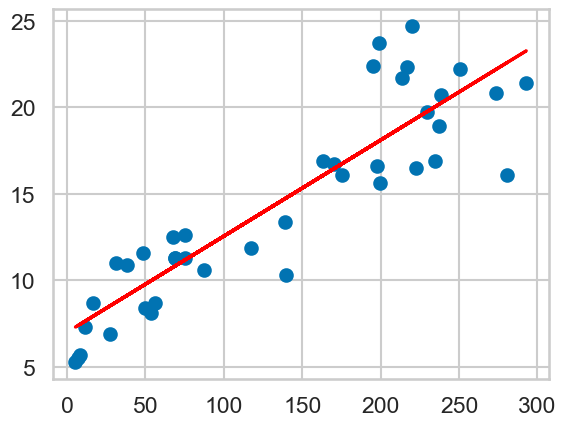

In [57]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [58]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_test_pred.flatten()})

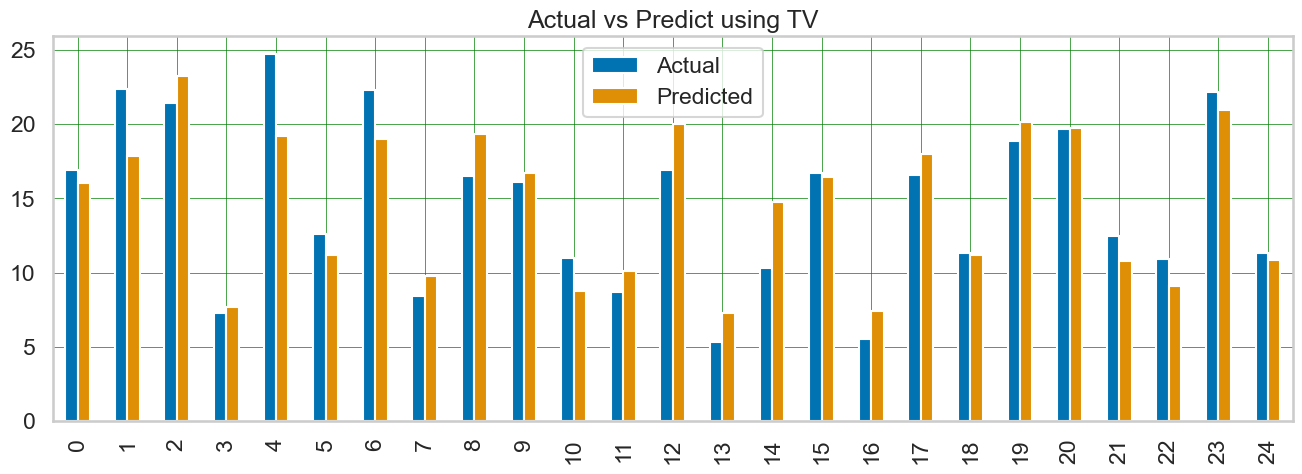

In [59]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,5), title='Actual vs Predict using TV')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

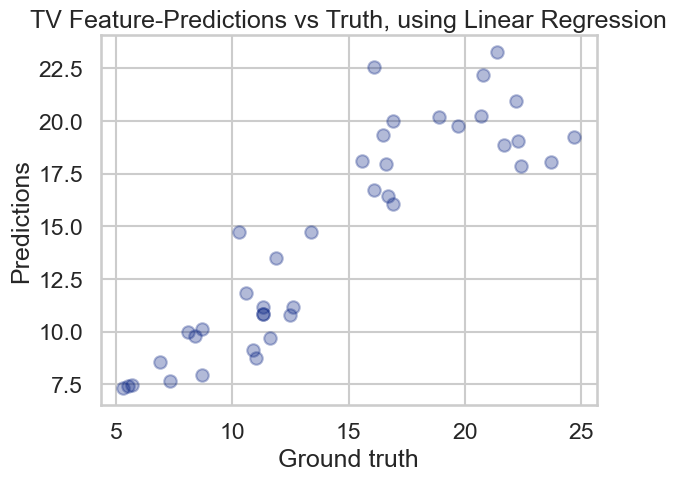

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#sns.set_context('talk')
#sns.set_style('ticks')
#sns.set_palette('dark')
# Set Seaborn context, style, and color palette for better contrast
sns.set_context('talk')   # Larger font sizes (suitable for presentations)
sns.set_style('whitegrid')  # Add light gridlines for better readability
sns.set_palette('dark')  # Use colorblind-friendly palette

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.3)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='TV Feature-Predictions vs Truth, using Linear Regression');

* sns.set_context('talk')-This sets the size and scaling of elements (like labels, titles, and ticks) in the plot to be more suitable for presentations or discussions.
* sns.set_style('ticks')- This applies a specific visual style to the plot with ticks on the axes, giving the plot a professional look with minimal clutter.
* sns.set_palette('dark')- This sets the color palette to 'dark'. It ensures that if multiple colors are used in the plot (e.g., in scatter plots with different groups), they follow a consistent dark-themed palette.

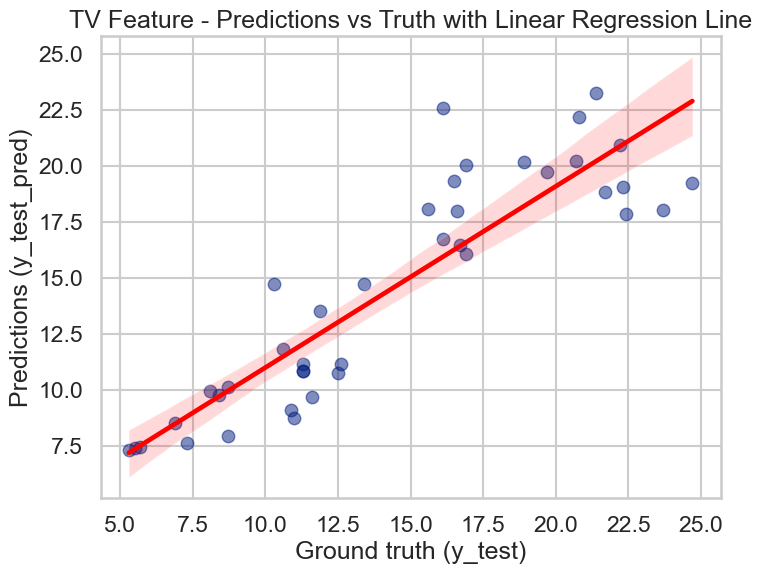

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style and context
sns.set_context('talk')
sns.set_style('whitegrid')

# Create a scatter plot with the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Ground truth (y_test)')
plt.ylabel('Predictions (y_test_pred)')
plt.title('TV Feature - Predictions vs Truth with Linear Regression Line')

# Show the plot
plt.show()


### PREDICT USING ALL FEATURES

In [18]:
X_all=data.drop('Sales', axis=1)
y_all=data.Sales

In [19]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [20]:
lr = LinearRegression()
lr.fit(X_train_all,y_train_all)
y_train_all_pred = lr.predict(X_train_all)
y_test_all_pred=lr.predict(X_test_all)

In [21]:
print("Result on Train Data with ALL:")
evaluate(y_train_all,y_train_all_pred)

Result on Train Data with ALL:
R Squared :  0.9001416005862131
Mean Absolute Error :  1.2344160869575866
Mean Squared Error :  2.6761426537826685
Root Mean Squared Error :  1.6358920055378559


In [22]:
print("Result on Test Data with ALL:")
evaluate(y_test_all,y_test_all_pred)

Result on Test Data with ALL:
R Squared :  0.9059011844150826
Mean Absolute Error :  1.2748262109549335
Mean Squared Error :  2.907756910271089
Root Mean Squared Error :  1.7052146229349223


In [23]:
df_all = pd.DataFrame({'Actual': y_test_all, 'Predicted': y_test_all_pred.flatten()})

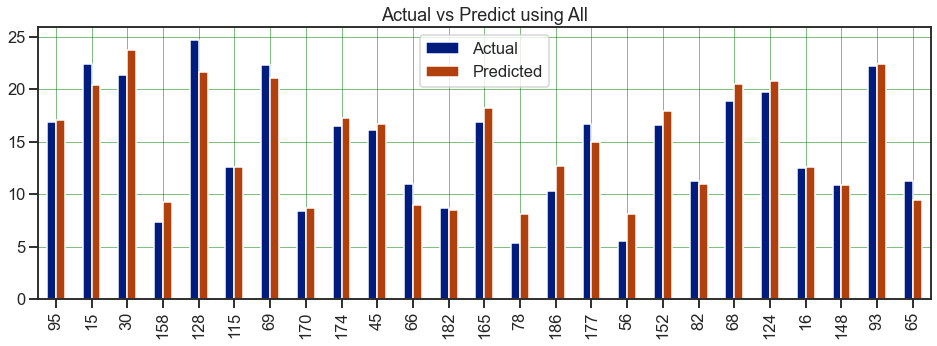

In [23]:
df2 = df_all.head(25)
df2.plot(kind='bar',figsize=(16,5), title='Actual vs Predict using All')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

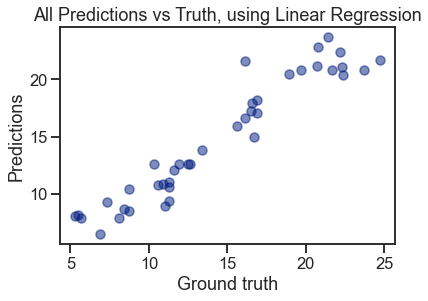

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test_all, y_test_all_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='All Predictions vs Truth, using Linear Regression');